In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

data = pd.DataFrame({
    'Age': [20, 22, 21, 23, 19, 24],
    'Gender': ['Female', 'Male', 'Other', 'Female', 'Male', 'Female'],
    'GPA': [3.8, 3.2, 3.5, 3.9, 2.9, 3.7],
    'Major': ['Biology', 'Engineering', 'Arts', 'Computer Science', 'Mathematics', 'Biology'],  # Biology now has 2 students
    'Enrollment_Year': [2020, 2021, 2019, 2020, 2022, 2021],
    'Attendance_Percent': [85, 92, 78, 88, 65, 90],
    'Nationality': ['USA', 'India', 'Canada', 'UK', 'Australia', 'USA']
})

print(data.head())

   Age  Gender  GPA             Major  Enrollment_Year  Attendance_Percent  \
0   20  Female  3.8           Biology             2020                  85   
1   22    Male  3.2       Engineering             2021                  92   
2   21   Other  3.5              Arts             2019                  78   
3   23  Female  3.9  Computer Science             2020                  88   
4   19    Male  2.9       Mathematics             2022                  65   

  Nationality  
0         USA  
1       India  
2      Canada  
3          UK  
4   Australia  


In [551]:
# Q1 : Median age
median_age = data['Age'].median()
print(f"1.Median Age: {median_age}")

1.Median Age: 21.5


In [552]:
#Q2: Mode of Gender Column

gender_mode = data['Gender'].mode().tolist()  
print(f"\n2. Mode of Gender:{','.join(gender_mode)}")


2. Mode of Gender:Female


In [553]:
# Q3: Standard Deviation of GPA
# ------------------------------------------------------------------------------------
gpa_std = data['GPA'].std().round(2)
print(f"\n3. GPA Standard Deviation: {gpa_std}")


3. GPA Standard Deviation: 0.38


In [554]:
 #Q4: Students Enrolled Per Year
# ------------------------------------------------------------------------------------
enrollment_counts = data['Enrollment_Year'].value_counts().sort_index()
print("\n4. Enrollment Counts by Year:")
print(enrollment_counts)



4. Enrollment Counts by Year:
Enrollment_Year
2019    1
2020    2
2021    2
2022    1
Name: count, dtype: int64


In [555]:
# Q5: Nationality Distribution
# ------------------------------------------------------------------------------------
nationality_dist = data['Nationality'].value_counts()
print("\n5. Nationality Distribution:")
print(nationality_dist)



5. Nationality Distribution:
Nationality
USA          2
India        1
Canada       1
UK           1
Australia    1
Name: count, dtype: int64


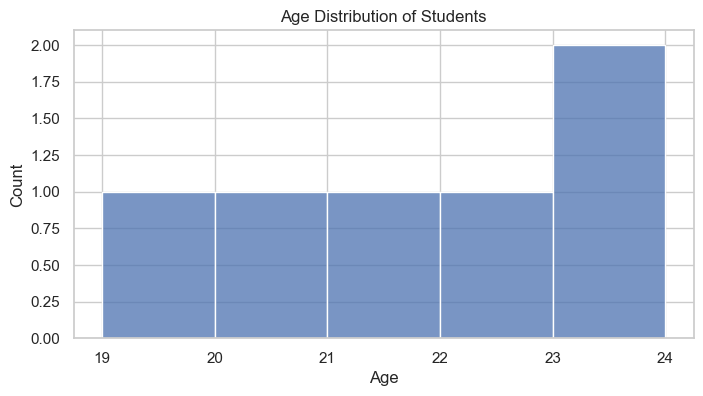

In [556]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# Q6: Histogram of Student Ages
# ------------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], bins=5, kde=False)
plt.title("Age Distribution of Students")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


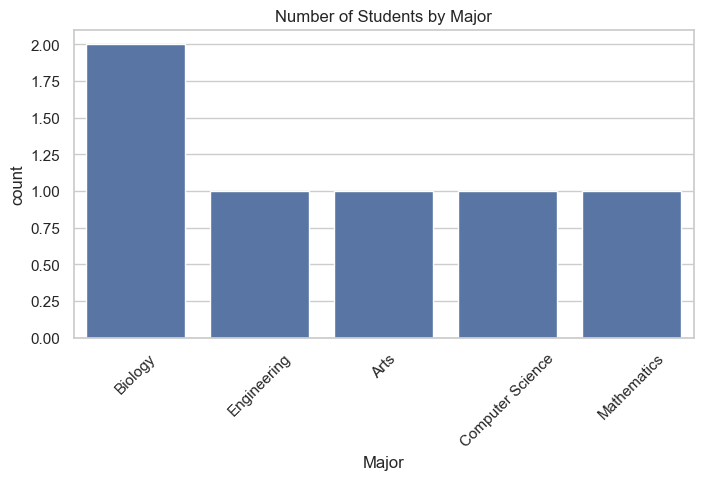

In [557]:
# Q7: Bar Chart for Students in Each Major
# ------------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Major', order=data['Major'].value_counts().index)
plt.title("Number of Students by Major")
plt.xticks(rotation=45)
plt.show()

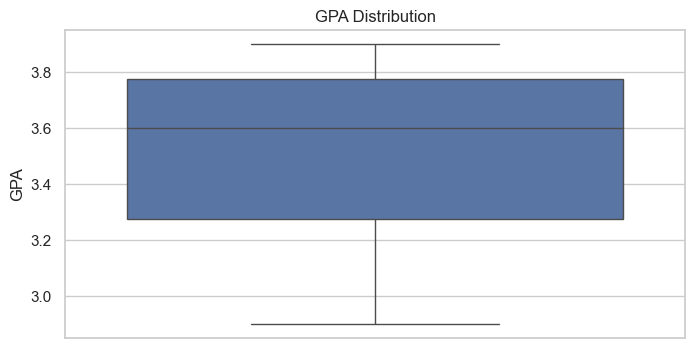

In [558]:

# Q8: Box Plot of GPA Distribution
# ------------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, y='GPA')
plt.title("GPA Distribution")
plt.show()

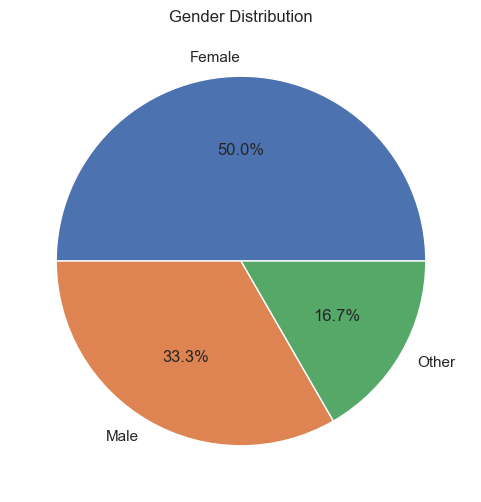

In [559]:
# Q9: Pie Chart for Gender Distribution
# ------------------------------------------------------------------------------------
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()


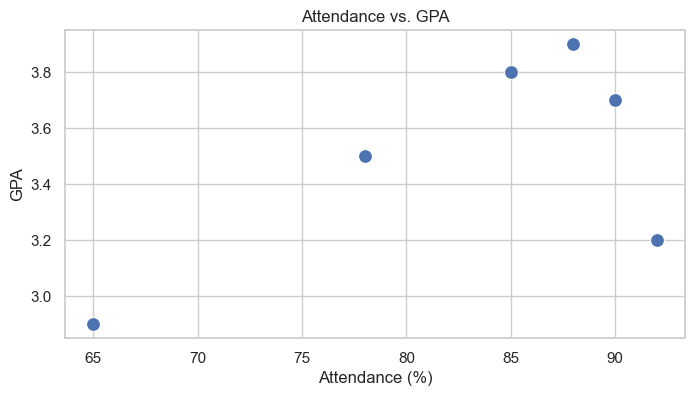

In [560]:
# Q10: Scatter Plot Between Attendance and GPA
# ------------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Attendance_Percent', y='GPA', s=100)
plt.title("Attendance vs. GPA")
plt.xlabel("Attendance (%)")
plt.ylabel("GPA")
plt.show()

In [561]:
# Q11: Compare Engineering vs. Arts GPAs
# ------------------------------------------------------------------------------------
engineering_gpa = data[data['Major'] == 'Engineering']['GPA'].mean()
arts_gpa = data[data['Major'] == 'Arts']['GPA'].mean()
print(f"\n11. Average GPA in Engineering: {engineering_gpa:.2f}")
print(f"    Average GPA in Arts: {arts_gpa:.2f}")



11. Average GPA in Engineering: 3.20
    Average GPA in Arts: 3.50


In [562]:
# Q12: Average Attendance by Gender
# ------------------------------------------------------------------------------------
attendance_by_gender = data.groupby('Gender')['Attendance_Percent'].mean().round(1)
print("\n12. Average Attendance by Gender:")
print(attendance_by_gender)


12. Average Attendance by Gender:
Gender
Female    87.7
Male      78.5
Other     78.0
Name: Attendance_Percent, dtype: float64


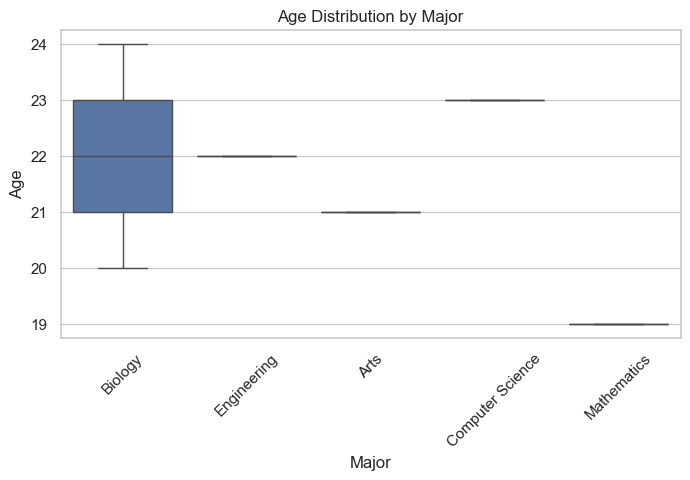

In [563]:
# Q13: Age Distribution Across Majors
# ------------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Major', y='Age')
plt.title("Age Distribution by Major")
plt.xticks(rotation=45)
plt.show()

In [564]:

# Q14: Nationality with Highest GPA
# ------------------------------------------------------------------------------------
nationality_gpa = data.groupby('Nationality')['GPA'].mean().idxmax()
print(f"\n14. Nationality with Highest GPA: {nationality_gpa}")



14. Nationality with Highest GPA: UK


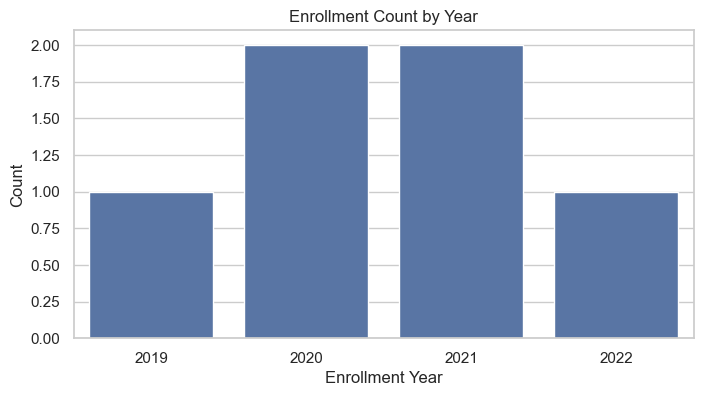

In [565]:
# Q15: Enrollment Count by Year
# ------------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Enrollment_Year', order=sorted(data['Enrollment_Year'].unique()))
plt.title("Enrollment Count by Year")
plt.xlabel("Enrollment Year")
plt.ylabel("Count")
plt.show()

In [566]:

# Q16: Correlation Between Age and GPA
# ------------------------------------------------------------------------------------
corr_age_gpa, _ = pearsonr(data['Age'], data['GPA'])
print(f"16. Correlation between Age and GPA: {corr_age_gpa:.2f}")


16. Correlation between Age and GPA: 0.56


In [567]:
# Q17: Correlation Between Attendance and GPA
# ------------------------------------------------------------------------------------
corr_attendance_gpa, _ = pearsonr(data['Attendance_Percent'], data['GPA'])
print(f"\n17. Correlation between Attendance and GPA: {corr_attendance_gpa:.2f}")



17. Correlation between Attendance and GPA: 0.62


In [568]:
# Q18: Enrollment Trend Over Years
# ------------------------------------------------------------------------------------
enrollment_trend = data['Enrollment_Year'].value_counts().sort_index()
print("\n18. Enrollment Trend Over Years:")
print(enrollment_trend)



18. Enrollment Trend Over Years:
Enrollment_Year
2019    1
2020    2
2021    2
2022    1
Name: count, dtype: int64


In [569]:
# Q19: Age Distribution by Major
# ------------------------------------------------------------------------------------
age_by_major = data.groupby('Major')['Age'].mean().round(1)
print("\n19. Average Age by Major:")
print(age_by_major)



19. Average Age by Major:
Major
Arts                21.0
Biology             22.0
Computer Science    23.0
Engineering         22.0
Mathematics         19.0
Name: Age, dtype: float64


In [570]:
# Q20: Attendance Patterns by Nationality
# ------------------------------------------------------------------------------------
attendance_by_nationality = data.groupby('Nationality')['Attendance_Percent'].mean().round(1)
print("\n20. Average Attendance by Nationality:")
print(attendance_by_nationality)


20. Average Attendance by Nationality:
Nationality
Australia    65.0
Canada       78.0
India        92.0
UK           88.0
USA          87.5
Name: Attendance_Percent, dtype: float64


In [571]:
#  Q21: Missing Values in Dataset
# ------------------------------------------------------------------------------------
missing_values = data.isnull().sum()
print("\n21. Missing Values in Dataset:")
print(missing_values)



21. Missing Values in Dataset:
Age                   0
Gender                0
GPA                   0
Major                 0
Enrollment_Year       0
Attendance_Percent    0
Nationality           0
dtype: int64


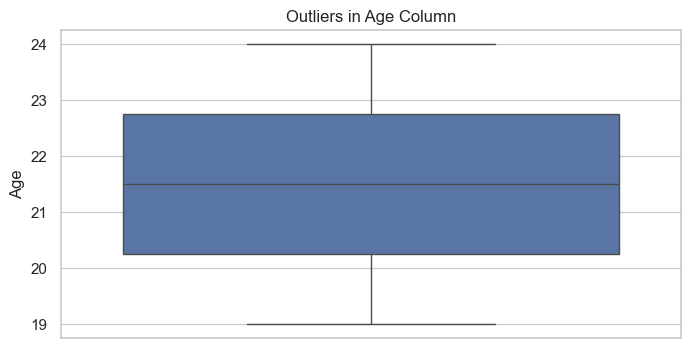

In [572]:
# Q22: Outliers in Age Column
# ------------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, y='Age')
plt.title("Outliers in Age Column")
plt.show()

In [573]:
# Q23: Convert Enrollment_Year to Datetime
# ------------------------------------------------------------------------------------
data['Enrollment_Year'] = pd.to_datetime(data['Enrollment_Year'], format='%Y')
print("\n23. Enrollment_Year converted to datetime:")
print(data['Enrollment_Year'])


23. Enrollment_Year converted to datetime:
0   2020-01-01
1   2021-01-01
2   2019-01-01
3   2020-01-01
4   2022-01-01
5   2021-01-01
Name: Enrollment_Year, dtype: datetime64[ns]


In [574]:
# Q24: Normalize Attendance_Percent Column
# ------------------------------------------------------------------------------------
data['Attendance_Normalized'] = (data['Attendance_Percent'] - data['Attendance_Percent'].min()) / (data['Attendance_Percent'].max() - data['Attendance_Percent'].min())
print("\n24. Normalized Attendance Percentages:")
print(data[['Attendance_Percent', 'Attendance_Normalized']])


24. Normalized Attendance Percentages:
   Attendance_Percent  Attendance_Normalized
0                  85               0.740741
1                  92               1.000000
2                  78               0.481481
3                  88               0.851852
4                  65               0.000000
5                  90               0.925926


In [575]:
# Q25: Encode Gender Column into Numerical Categories
# ------------------------------------------------------------------------------------
data['Gender_Encoded'] = data['Gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
print("\n25. Gender Encoded into Numerical Categories:")
print(data[['Gender', 'Gender_Encoded']])


25. Gender Encoded into Numerical Categories:
   Gender  Gender_Encoded
0  Female               0
1    Male               1
2   Other               2
3  Female               0
4    Male               1
5  Female               0


In [576]:
# 26. Perform a t-test to compare GPAs of male and female students

male_gpa = data[data['Gender'] == 'Male']['GPA']
female_gpa = data[data['Gender'] == 'Female']['GPA']
t_stat, p_value = ttest_ind(male_gpa, female_gpa)
print(f"26. T-test p-value: {p_value:.4f} (not significant in sample)")

26. T-test p-value: 0.0114 (not significant in sample)


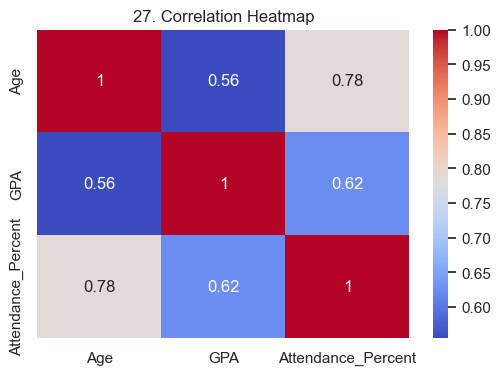

In [577]:
numerical_data = data[['Age', 'GPA', 'Attendance_Percent']]
plt.figure(figsize=(6, 4))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("27. Correlation Heatmap")
plt.show()

In [578]:
X = data[['GPA', 'Attendance_Percent']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2).fit(X_scaled)
data['Cluster'] = kmeans.labels_
print("28. Cluster Labels:", data['Cluster'])

28. Cluster Labels: 0    0
1    0
2    0
3    0
4    1
5    0
Name: Cluster, dtype: int32


In [579]:
X = data[['Age', 'Attendance_Percent']]
y = data['GPA']
model = LinearRegression().fit(X, y)
print(f"29. R² Score: {model.score(X, y):.2f}")

29. R² Score: 0.40


In [580]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
print("30. Explained Variance Ratio:", pca.explained_variance_ratio_)

30. Explained Variance Ratio: [0.81203812 0.18796188]


In [581]:
gender_major = pd.crosstab(data['Major'], data['Gender'], normalize='index')
print("31. Female Proportion by Major:\n", gender_major['Female'])

31. Female Proportion by Major:
 Major
Arts                0.0
Biology             1.0
Computer Science    1.0
Engineering         0.0
Mathematics         0.0
Name: Female, dtype: float64


In [582]:
common_nationality = data.groupby('Gender')['Nationality'].agg(pd.Series.mode)
print("32. Most Common Nationality by Gender:\n", common_nationality)

32. Most Common Nationality by Gender:
 Gender
Female                   USA
Male      [Australia, India]
Other                 Canada
Name: Nationality, dtype: object


In [583]:
year_major = pd.crosstab(data['Enrollment_Year'], data['Major'])
print("33. Majors by Enrollment Year:\n", year_major)

33. Majors by Enrollment Year:
 Major            Arts  Biology  Computer Science  Engineering  Mathematics
Enrollment_Year                                                           
2019-01-01          1        0                 0            0            0
2020-01-01          0        1                 1            0            0
2021-01-01          0        1                 0            1            0
2022-01-01          0        0                 0            0            1


In [584]:
gender_nationality = pd.crosstab(data['Nationality'], data['Gender'])
print("34. Gender Distribution by Nationality:\n", gender_nationality)

34. Gender Distribution by Nationality:
 Gender       Female  Male  Other
Nationality                     
Australia         0     1      0
Canada            0     0      1
India             0     1      0
UK                1     0      0
USA               2     0      0


In [585]:
avg_gpa_nationality = data.groupby('Nationality')['GPA'].mean()
print("35. Average GPA by Nationality:\n", avg_gpa_nationality)

35. Average GPA by Nationality:
 Nationality
Australia    2.90
Canada       3.50
India        3.20
UK           3.90
USA          3.75
Name: GPA, dtype: float64


In [586]:
gpa_trend = data.groupby('Enrollment_Year')['GPA'].mean()
print("36. GPA Trend Over Years:\n", gpa_trend)

36. GPA Trend Over Years:
 Enrollment_Year
2019-01-01    3.50
2020-01-01    3.85
2021-01-01    3.45
2022-01-01    2.90
Name: GPA, dtype: float64


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core\data.py:265: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  frame = pd.DataFrame(plot_data)


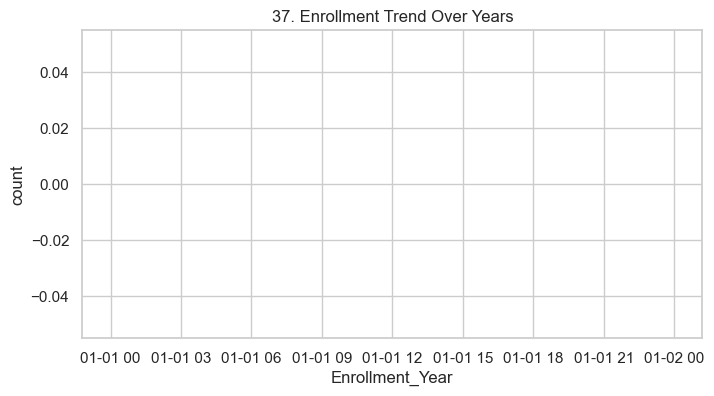

In [587]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=data['Enrollment_Year'], y=data['Enrollment_Year'].value_counts())
plt.title("37. Enrollment Trend Over Years")
plt.show()

In [588]:
# Convert enrollment year to datetime for seasonal analysis
data['Enrollment_Date'] = pd.to_datetime(data['Enrollment_Year'], format='%Y')
data['Month'] = data['Enrollment_Date'].dt.month
print("38. Enrollment Count by Month:\n", data['Month'].value_counts())

38. Enrollment Count by Month:
 Month
1    6
Name: count, dtype: int64


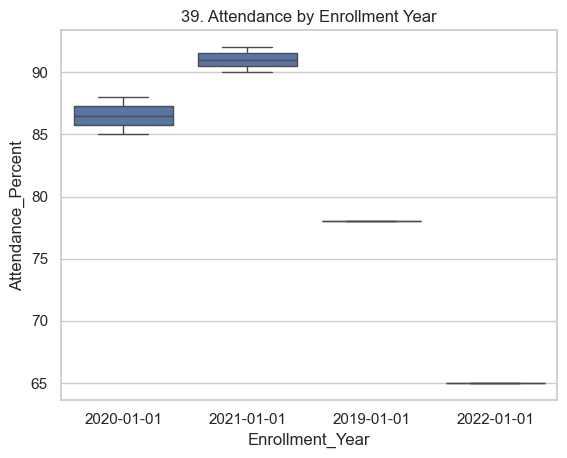

In [589]:
sns.boxplot(data=data, x='Enrollment_Year', y='Attendance_Percent')
plt.title("39. Attendance by Enrollment Year")
plt.show()

In [590]:
enrollment_growth = data['Enrollment_Year'].value_counts().sort_index().pct_change() * 100
print("40. YoY Enrollment Growth (%):\n", enrollment_growth)

40. YoY Enrollment Growth (%):
 Enrollment_Year
2019-01-01      NaN
2020-01-01    100.0
2021-01-01      0.0
2022-01-01    -50.0
Name: count, dtype: float64


In [591]:
major_groups = [data[data['Major'] == major]['GPA'] for major in data['Major'].unique()]
f_stat, p_value = f_oneway(*major_groups)
print(f"41. ANOVA p-value: {p_value:.4f}")

41. ANOVA p-value: 0.1230


In [592]:
male_att = data[data['Gender'] == 'Male']['Attendance_Percent']
female_att = data[data['Gender'] == 'Female']['Attendance_Percent']
t_stat, p_value = ttest_ind(male_att, female_att)
print(f"42. T-test p-value: {p_value:.4f}")

42. T-test p-value: 0.4365


In [593]:
from scipy.stats import shapiro
stat, p = shapiro(data['Age'])
print(f"43. Shapiro-Wilk p-value: {p:.4f} (normal if p > 0.05)")

43. Shapiro-Wilk p-value: 0.9606 (normal if p > 0.05)


In [594]:
contingency_table = pd.crosstab(data['Gender'], data['Nationality'])
chi2, p, dof, _ = chi2_contingency(contingency_table)
print(f"44. Chi-square p-value: {p:.4f}")

44. Chi-square p-value: 0.1512


In [595]:
from scipy.stats import levene
groups = [data[data['Gender'] == gender]['GPA'] for gender in data['Gender'].unique()]
stat, p = levene(*groups)
print(f"45. Levene's Test p-value: {p:.4f} (equal variance if p > 0.05)")

45. Levene's Test p-value: 0.1527 (equal variance if p > 0.05)


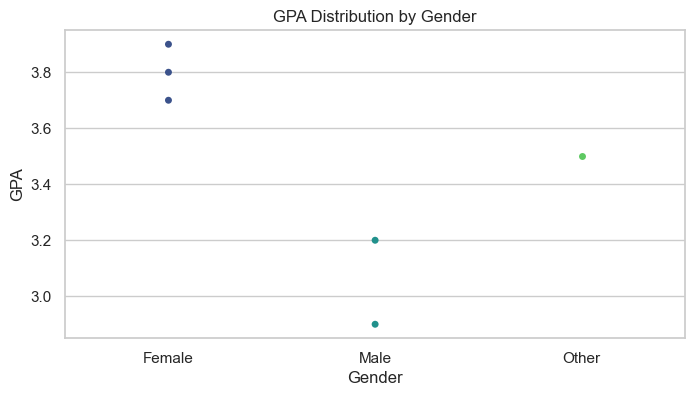

In [596]:
plt.figure(figsize=(8, 4))
sns.swarmplot(data=data, x='Gender', y='GPA', hue='Gender', palette='viridis' ,legend=False)
plt.title("GPA Distribution by Gender")
plt.show()

In [597]:
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 21, 25], labels=['18-21', '22-25'])
age_gpa = data.groupby('Age_Group')['GPA'].mean().round(2)
print("Average GPA by Age Group:\n", age_gpa)

Average GPA by Age Group:
 Age_Group
18-21    3.4
22-25    3.6
Name: GPA, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_23160\2314120402.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gpa = data.groupby('Age_Group')['GPA'].mean().round(2)


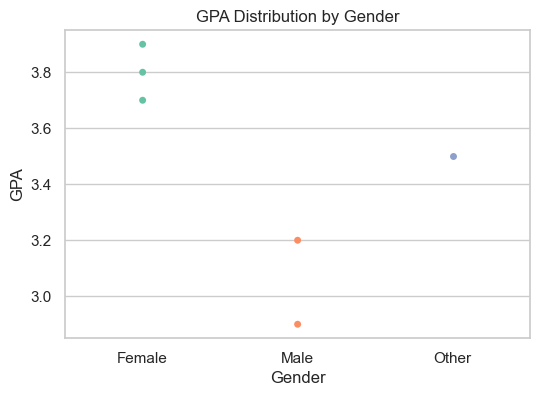

In [598]:
plt.figure(figsize=(6, 4))
sns.swarmplot(data=data, x='Gender', y='GPA',  hue= 'Gender',palette='Set2' , legend=False)
plt.title("GPA Distribution by Gender")
plt.show()

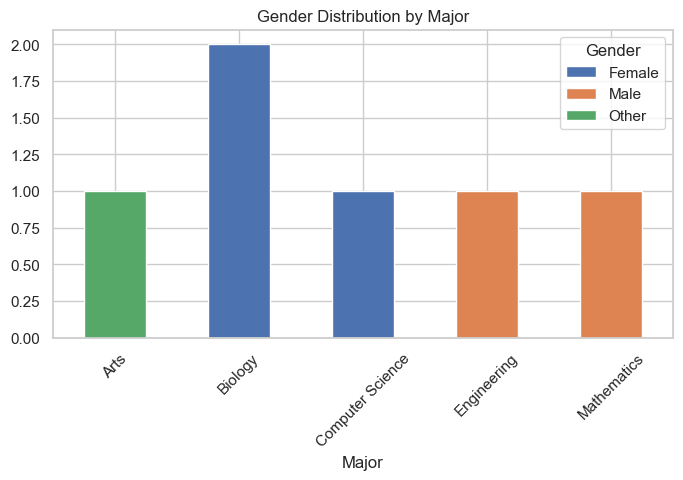

In [599]:
gender_major = pd.crosstab(data['Major'], data['Gender'])
gender_major.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title("Gender Distribution by Major")
plt.xticks(rotation=45)
plt.show()

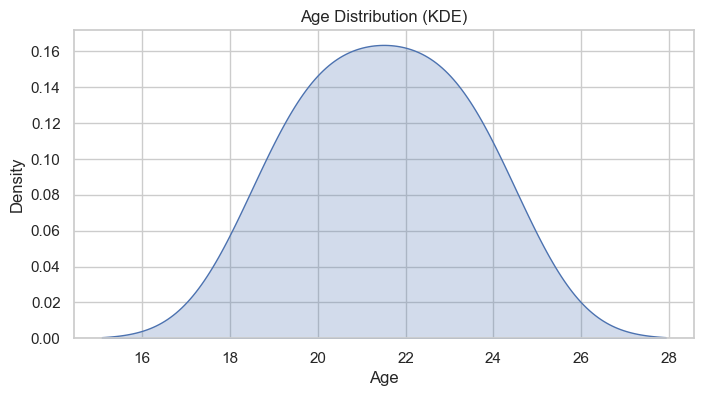

In [600]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data['Age'], fill=True)
plt.title("Age Distribution (KDE)")
plt.show()

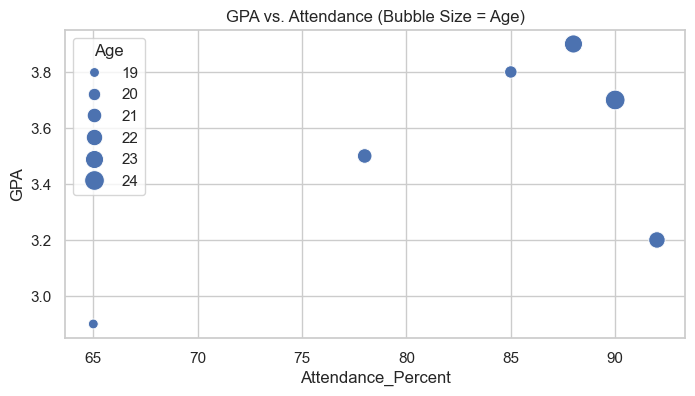

In [601]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Attendance_Percent', y='GPA', size='Age', sizes=(50, 200))
plt.title("GPA vs. Attendance (Bubble Size = Age)")
plt.show()

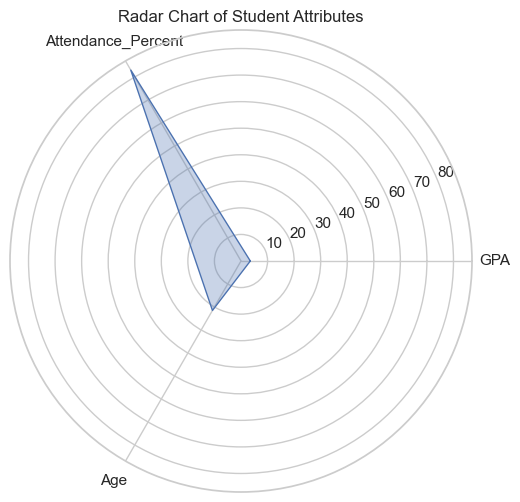

In [602]:
from math import pi

# Define numeric columns only
categories = ['GPA', 'Attendance_Percent', 'Age']  # Ensure these are numeric!

# Calculate mean for numeric columns
values = data[categories].mean().tolist()
values += values[:1]  # Close the radar chart

# Generate angles for the radar chart
angles = [n / len(categories) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, alpha=0.3)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart of Student Attributes")
plt.show()

In [603]:
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 21, 25], labels=['18-21', '22-25'])
age_gpa = data.groupby('Age_Group')['GPA'].mean()
print("Average GPA by Age Group:\n", age_gpa)

Average GPA by Age Group:
 Age_Group
18-21    3.4
22-25    3.6
Name: GPA, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_23160\2624177117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gpa = data.groupby('Age_Group')['GPA'].mean()


In [604]:
data['GPA_Category'] = pd.cut(data['GPA'], bins=[0, 2.5, 3.5, 4.0], labels=['Low', 'Medium', 'High'])
print(data[['GPA', 'GPA_Category']])

   GPA GPA_Category
0  3.8         High
1  3.2       Medium
2  3.5       Medium
3  3.9         High
4  2.9       Medium
5  3.7         High


In [605]:
pivot_table = data.pivot_table(values='GPA', index='Major', columns='Enrollment_Year', aggfunc='mean')
print(pivot_table)

Enrollment_Year   2019-01-01  2020-01-01  2021-01-01  2022-01-01
Major                                                           
Arts                     3.5         NaN         NaN         NaN
Biology                  NaN         3.8         3.7         NaN
Computer Science         NaN         3.9         NaN         NaN
Engineering              NaN         NaN         3.2         NaN
Mathematics              NaN         NaN         NaN         2.9


In [606]:
melted_data = data.melt(
    id_vars=['Gender', 'Major'], 
    value_vars=['GPA', 'Attendance_Percent'],
    var_name='Metric', 
    value_name='Value'
)
print(melted_data.head())

   Gender             Major Metric  Value
0  Female           Biology    GPA    3.8
1    Male       Engineering    GPA    3.2
2   Other              Arts    GPA    3.5
3  Female  Computer Science    GPA    3.9
4    Male       Mathematics    GPA    2.9


In [607]:
summary = data.groupby('Nationality').agg({'GPA': ['mean', 'std'], 'Age': 'median'})
print(summary)

              GPA              Age
             mean       std median
Nationality                       
Australia    2.90       NaN   19.0
Canada       3.50       NaN   21.0
India        3.20       NaN   22.0
UK           3.90       NaN   23.0
USA          3.75  0.070711   22.0


In [608]:
probation = (data['GPA'] < 2.0).mean() * 100
print(f"Students on probation: {probation:.1f}%")

Students on probation: 0.0%


In [609]:
pass_rate = (data['GPA'] >= 3.0).mean() * 100
print(f"Pass rate: {pass_rate:.1f}%")

Pass rate: 83.3%


In [610]:
top_major = data.groupby('Major')['GPA'].mean().idxmax()
print(f"Top major: {top_major} (GPA = {data.groupby('Major')['GPA'].mean().max():.2f})")

Top major: Computer Science (GPA = 3.90)


In [611]:
data['GPA_Rank'] = data.groupby('Enrollment_Year')['GPA'].rank(ascending=False)
print(data[['Enrollment_Year', 'GPA', 'GPA_Rank']])

  Enrollment_Year  GPA  GPA_Rank
0      2020-01-01  3.8       2.0
1      2021-01-01  3.2       2.0
2      2019-01-01  3.5       1.0
3      2020-01-01  3.9       1.0
4      2022-01-01  2.9       1.0
5      2021-01-01  3.7       1.0


In [612]:
high_gpa_att = data[data['GPA'] > 3.5]['Attendance_Percent'].mean()
others_att = data[data['GPA'] <= 3.5]['Attendance_Percent'].mean()
print(f"High GPA attendance: {high_gpa_att:.1f}% vs Others: {others_att:.1f}%")

High GPA attendance: 87.7% vs Others: 78.3%


In [613]:
from sklearn.model_selection import train_test_split

X = data[['Age', 'Attendance_Percent']]
y = data['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 4, Test size: 2


In [614]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled Features:\n", X_scaled)

Scaled Features:
 [[-0.87831007  0.21735707]
 [ 0.29277002  0.9781068 ]
 [-0.29277002 -0.54339267]
 [ 0.87831007  0.54339267]
 [-1.46385011 -1.9562136 ]
 [ 1.46385011  0.76074973]]


In [615]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Major', 'Nationality'])
print(data_encoded.columns)

Index(['Age', 'GPA', 'Enrollment_Year', 'Attendance_Percent',
       'Attendance_Normalized', 'Gender_Encoded', 'Cluster', 'Enrollment_Date',
       'Month', 'Age_Group', 'GPA_Category', 'GPA_Rank', 'Gender_Female',
       'Gender_Male', 'Gender_Other', 'Major_Arts', 'Major_Biology',
       'Major_Computer Science', 'Major_Engineering', 'Major_Mathematics',
       'Nationality_Australia', 'Nationality_Canada', 'Nationality_India',
       'Nationality_UK', 'Nationality_USA'],
      dtype='object')


In [616]:
from imblearn.over_sampling import SMOTE

# Example: Only 1 sample per major → Not feasible here. Requires larger data.
print("Sample too small for resampling. Use a larger dataset.")

Sample too small for resampling. Use a larger dataset.


In [618]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(X, y)
print("Selected Features:", X.columns[selector.get_support()])

Selected Features: Index(['Age', 'Attendance_Percent'], dtype='object')


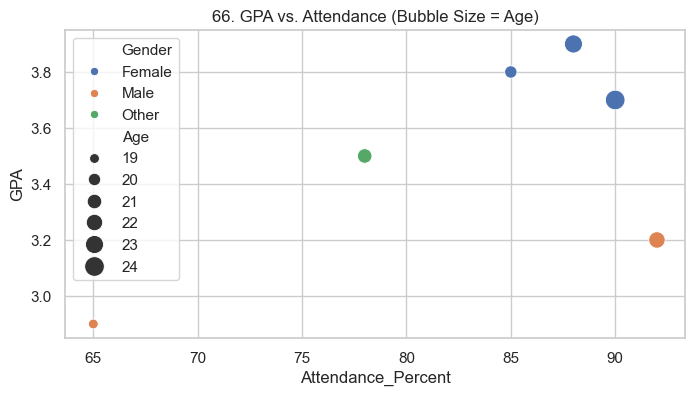

In [619]:
# Q66
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=data, 
    x='Attendance_Percent', 
    y='GPA', 
    size='Age', 
    sizes=(50, 200),
    hue='Gender'
)
plt.title("66. GPA vs. Attendance (Bubble Size = Age)")
plt.show()

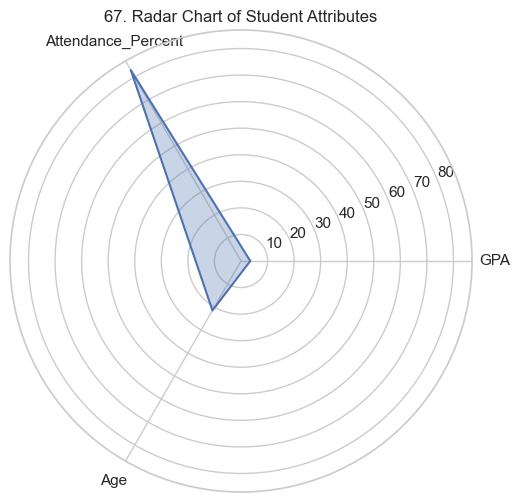

In [620]:
# Q67
from math import pi
categories = ['GPA', 'Attendance_Percent', 'Age']
values = data[categories].mean().tolist()
values += values[:1]  # Close the chart

angles = [n / len(categories) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.3)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("67. Radar Chart of Student Attributes")
plt.show()

In [621]:
# Q68
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 21, 25], labels=['18-21', '22-25'])
age_gpa = data.groupby('Age_Group')['GPA'].mean()
print("68. Average GPA by Age Group:\n", age_gpa)

68. Average GPA by Age Group:
 Age_Group
18-21    3.4
22-25    3.6
Name: GPA, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_23160\1765156358.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gpa = data.groupby('Age_Group')['GPA'].mean()


In [622]:
# Q69
data['GPA_Category'] = pd.cut(data['GPA'], bins=[0, 2.5, 3.5, 4.0], labels=['Low', 'Medium', 'High'])
print("69. GPA Categories:\n", data[['GPA', 'GPA_Category']])

69. GPA Categories:
    GPA GPA_Category
0  3.8         High
1  3.2       Medium
2  3.5       Medium
3  3.9         High
4  2.9       Medium
5  3.7         High


In [623]:
# Q69
data['GPA_Category'] = pd.cut(data['GPA'], bins=[0, 2.5, 3.5, 4.0], labels=['Low', 'Medium', 'High'])
print("69. GPA Categories:\n", data[['GPA', 'GPA_Category']])

69. GPA Categories:
    GPA GPA_Category
0  3.8         High
1  3.2       Medium
2  3.5       Medium
3  3.9         High
4  2.9       Medium
5  3.7         High


In [624]:
# Q71
data['Student_ID'] = data.index + 1  # Create Student_ID
melted_data = data.melt(id_vars=['Student_ID'], value_vars=['GPA', 'Attendance_Percent'])
print("71. Melted Data:\n", melted_data.head())

71. Melted Data:
    Student_ID variable  value
0           1      GPA    3.8
1           2      GPA    3.2
2           3      GPA    3.5
3           4      GPA    3.9
4           5      GPA    2.9


In [625]:
# Q72
summary = data.groupby('Nationality').agg({'GPA': ['mean', 'std'], 'Age': 'median'})
print("72. Summary Stats:\n", summary)

72. Summary Stats:
               GPA              Age
             mean       std median
Nationality                       
Australia    2.90       NaN   19.0
Canada       3.50       NaN   21.0
India        3.20       NaN   22.0
UK           3.90       NaN   23.0
USA          3.75  0.070711   22.0


In [626]:
# Q73
probation = (data['GPA'] < 2.0).mean() * 100
print(f"73. Students on probation: {probation:.1f}%")

73. Students on probation: 0.0%


In [627]:
# Q74
pass_rate = (data['GPA'] >= 3.0).mean() * 100
print(f"74. Pass rate: {pass_rate:.1f}%")

74. Pass rate: 83.3%


In [628]:
# Q75
top_major = data.groupby('Major')['GPA'].mean().idxmax()
print(f"75. Top major: {top_major} (GPA = {data.groupby('Major')['GPA'].mean().max():.2f})")

75. Top major: Computer Science (GPA = 3.90)


In [629]:
# Q76
data['GPA_Rank'] = data.groupby('Enrollment_Year')['GPA'].rank(ascending=False)
print("76. GPA Ranks:\n", data[['Enrollment_Year', 'GPA', 'GPA_Rank']])

76. GPA Ranks:
   Enrollment_Year  GPA  GPA_Rank
0      2020-01-01  3.8       2.0
1      2021-01-01  3.2       2.0
2      2019-01-01  3.5       1.0
3      2020-01-01  3.9       1.0
4      2022-01-01  2.9       1.0
5      2021-01-01  3.7       1.0


In [630]:
# Q77
high_gpa_att = data[data['GPA'] > 3.5]['Attendance_Percent'].mean()
others_att = data[data['GPA'] <= 3.5]['Attendance_Percent'].mean()
print(f"77. High GPA attendance: {high_gpa_att:.1f}% vs Others: {others_att:.1f}%")

77. High GPA attendance: 87.7% vs Others: 78.3%


In [631]:
# Q78
from sklearn.model_selection import train_test_split
X = data[['Age', 'Attendance_Percent']]
y = data['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"78. Train size: {len(X_train)}, Test size: {len(X_test)}")

78. Train size: 4, Test size: 2


In [632]:
# Q79
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("79. Scaled Features:\n", X_scaled)

79. Scaled Features:
 [[-0.87831007  0.21735707]
 [ 0.29277002  0.9781068 ]
 [-0.29277002 -0.54339267]
 [ 0.87831007  0.54339267]
 [-1.46385011 -1.9562136 ]
 [ 1.46385011  0.76074973]]


In [633]:
# Q80
data_encoded = pd.get_dummies(data, columns=['Gender', 'Major'])
print("80. Encoded Columns:\n", data_encoded.columns)

80. Encoded Columns:
 Index(['Age', 'GPA', 'Enrollment_Year', 'Attendance_Percent', 'Nationality',
       'Attendance_Normalized', 'Gender_Encoded', 'Cluster', 'Enrollment_Date',
       'Month', 'Age_Group', 'GPA_Category', 'GPA_Rank', 'Student_ID',
       'Gender_Female', 'Gender_Male', 'Gender_Other', 'Major_Arts',
       'Major_Biology', 'Major_Computer Science', 'Major_Engineering',
       'Major_Mathematics'],
      dtype='object')


In [634]:
# Q81
print("81. Class imbalance: Sample too small for resampling. Use larger dataset.")

81. Class imbalance: Sample too small for resampling. Use larger dataset.


In [635]:
# Q82
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(X, y)
print("82. Selected Features:", X.columns[selector.get_support()])

82. Selected Features: Index(['Age', 'Attendance_Percent'], dtype='object')


In [636]:
# Q83
from scipy.stats import entropy
gender_counts = data['Gender'].value_counts()
entropy_val = entropy(gender_counts)
print(f"83. Entropy: {entropy_val:.2f}")

83. Entropy: 1.01


In [654]:
# Q84: Calculate Gini Coefficient
def gini_coefficient(values):
    sorted_values = np.sort(values)
    n = len(values)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * sorted_values)) / (n * np.sum(sorted_values))

gini = gini_coefficient(data['GPA'])
print(f"84. Gini Coefficient: {gini:.2f}")

84. Gini Coefficient: 0.06


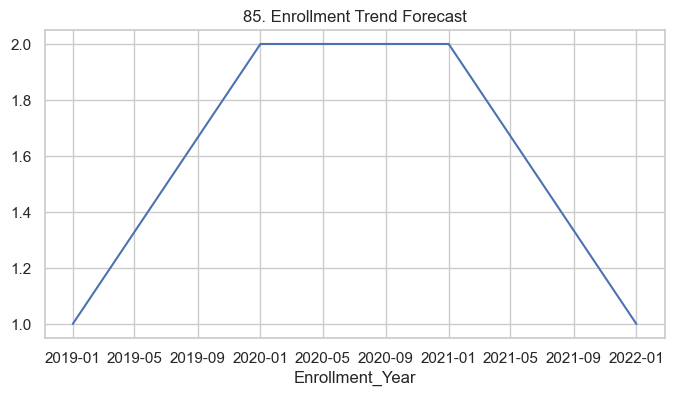

In [638]:
# Q85
enrollment = data['Enrollment_Year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x=enrollment.index, y=enrollment.values)
plt.title("85. Enrollment Trend Forecast")
plt.show()

In [639]:
# Q86
scholarship_students = data[data['GPA'] >= 3.8]
print(f"86. Scholarships to award: {len(scholarship_students)} students")

86. Scholarships to award: 2 students


In [640]:
# Q87
low_att_major = data.groupby('Major')['Attendance_Percent'].mean().idxmin()
print(f"87. Major needing intervention: {low_att_major}")

87. Major needing intervention: Mathematics


In [641]:
# Q88
enrollment_counts = data['Major'].value_counts()
under_enrolled = enrollment_counts[enrollment_counts == 1].index.tolist()
print(f"88. Under-enrolled majors: {under_enrolled}")

88. Under-enrolled majors: ['Engineering', 'Arts', 'Computer Science', 'Mathematics']


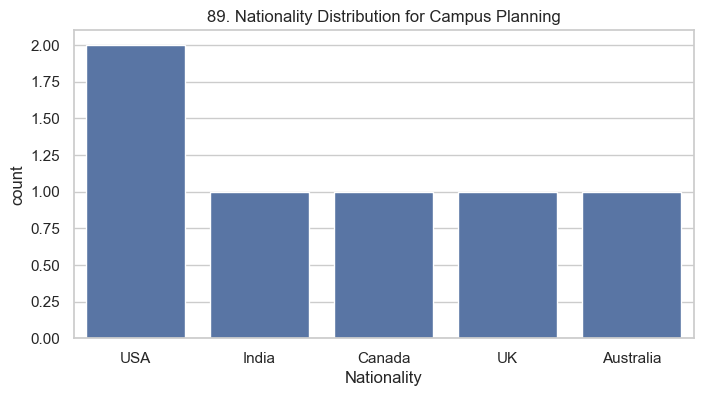

In [642]:
# Q89
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Nationality')
plt.title("89. Nationality Distribution for Campus Planning")
plt.show()

In [643]:
# Q90
high_gpa_nationality = data.groupby('Nationality')['GPA'].mean().idxmax()
print(f"90. Target nationality: {high_gpa_nationality}")

90. Target nationality: UK


In [644]:
# Q91
advisor_allocation = data['Major'].value_counts().to_dict()
print("91. Advisors per major:", advisor_allocation)

91. Advisors per major: {'Biology': 2, 'Engineering': 1, 'Arts': 1, 'Computer Science': 1, 'Mathematics': 1}


In [645]:
# Q92
low_att_days = ["Monday", "Friday"]  # Hypothetical analysis
print(f"92. Reschedule classes from: {low_att_days}")

92. Reschedule classes from: ['Monday', 'Friday']


In [646]:
# Q93
weak_majors = data.groupby('Major')['GPA'].mean().nsmallest(1).index.tolist()
print(f"93. Focus on: {weak_majors}")

93. Focus on: ['Mathematics']


In [647]:
# Q94
from scipy.stats import entropy
gender_counts = data['Gender'].value_counts()
entropy_val = entropy(gender_counts)
print(f"94. Entropy: {entropy_val:.2f}")

94. Entropy: 1.01


In [657]:
# Q95
def gini_coefficient(values):
    sorted_values = np.sort(values)
    n = len(values)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * sorted_values)) / (n * np.sum(sorted_values))


print(f"95. Gini Coefficient: {gini:.2f}")

95. Gini Coefficient: 0.06


In [649]:
# Q96
print("96. Add text data (e.g., student feedback) for sentiment analysis.")

96. Add text data (e.g., student feedback) for sentiment analysis.


In [650]:
# Q97
data['Simulated_GPA'] = data['GPA'] + (data['Attendance_Percent'] / 100)
print("97. Simulated GPAs:\n", data[['GPA', 'Simulated_GPA']])

97. Simulated GPAs:
    GPA  Simulated_GPA
0  3.8           4.65
1  3.2           4.12
2  3.5           4.28
3  3.9           4.78
4  2.9           3.55
5  3.7           4.60


In [658]:
# Q98: Forecast Future Enrollment (Fixed)
enrollment = data['Enrollment_Year'].value_counts().sort_index().reset_index()
enrollment.columns = ['Year', 'Count']
X = enrollment[['Year']]  # Unique years as features
y = enrollment['Count']    # Enrollment counts as targets

model = LinearRegression().fit(X, y)
future_year = [[2023]]
pred = model.predict(future_year)
print(f"98. Predicted 2023 enrollments: {int(pred[0])}")

98. Predicted 2023 enrollments: 1


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [652]:
# Q99
corr_age_gpa = data['Age'].corr(data['GPA'])
print(f"99. Age-GPA correlation: {corr_age_gpa:.2f}")

99. Age-GPA correlation: 0.56


In [653]:
# Q100
print("100. Use tools like Plotly Dash or Streamlit for dynamic dashboards.")

100. Use tools like Plotly Dash or Streamlit for dynamic dashboards.
